# <span style='color: red'>Author: Nikolin Prenga</span>
# <span style='color: red'>Created: May 1, 2024</span>


In [1]:
# Importing the Image_Data_Preprocessing module, which I authored.
# It processes raw images from the dataset by removing backgrounds,
# enlarging brain areas, and resizing images to uniform dimensions.
# Labels are derived from filename prefixes, which correspond to specific tumor types.

from Image_Data_Preprocessing import Image_Processing as Process_Images
# Importing essential libraries for data manipulation, visualization, and machine learning tasks.
# This includes numpy for numerical operations, matplotlib and seaborn for plotting,
# TensorFlow and Keras for model development and training, and sklearn for advanced metrics and model evaluation.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import pandas as pd
import warnings
from sklearn.metrics import roc_curve
from sklearn import metrics
import scipy.special
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.optimizers import Adam
import os
import keras_tuner as kt
import cv2
# Ignore all warnings
warnings.filterwarnings("ignore")

# <span style='color:red'> Here are the  Class names </span>

In [2]:
# Class names
class_names = {
    0: "No Tumor",
    1: "Glioma Tumor",
    2: "Meningioma Tumor",
    3: "Pituitary Tumor"
}

## <span style="color:blue">Import the Labels and Datasets for Both Training and Testing</span>


In [3]:
home_dir_train ='Make_one_Training_dataset/'
home_dir_test ='Make_one_Testingdataset/'

training_data_MRI, training_labels_MRI, training_text_MRI = Process_Images(home_dir_train).load_data_and_crop_Optionally()
X_test_MRI, y_test_MRI, y_text_MRI = Process_Images(home_dir_test).load_data_and_crop_Optionally()


## <span style='color: olive'> Access all information from the training dataset using the Image_Data_Preprocessing module, <br> imported as Process_Images, which retrieves data directly from the specified path.</span>

In [4]:
Process_Images(home_dir_train).Check_size_shape()

Total number of samples analyzed: 2870
Number of non-square images (different width and height): 406
Number of square images smaller than 250x250 pixels: 82
Number of square images sized between 250x250 and 299x299 pixels: 15
Number of square images sized between 300x300 and 399x399 pixels: 12
Number of square images sized between 400x400 and 499x499 pixels: 19
Number of square images sized between 500x500 and 599x599 pixels: 2314
Number of square images larger than or equal to 600x600 pixels: 22


## <span style='color: olive'> Access all information from the testing dataset using the Image_Data_Preprocessing module, <br> imported as Process_Images, which retrieves data directly from the specified path.</span>

In [5]:
Process_Images(home_dir_test).Check_size_shape()

Total number of samples analyzed: 394
Number of non-square images (different width and height): 282
Number of square images smaller than 250x250 pixels: 53
Number of square images sized between 250x250 and 299x299 pixels: 3
Number of square images sized between 300x300 and 399x399 pixels: 3
Number of square images sized between 400x400 and 499x499 pixels: 12
Number of square images sized between 500x500 and 599x599 pixels: 40
Number of square images larger than or equal to 600x600 pixels: 1


# <span style="color:blue" > Plot nine images that have been resized and cropped from the training dataset.</span>



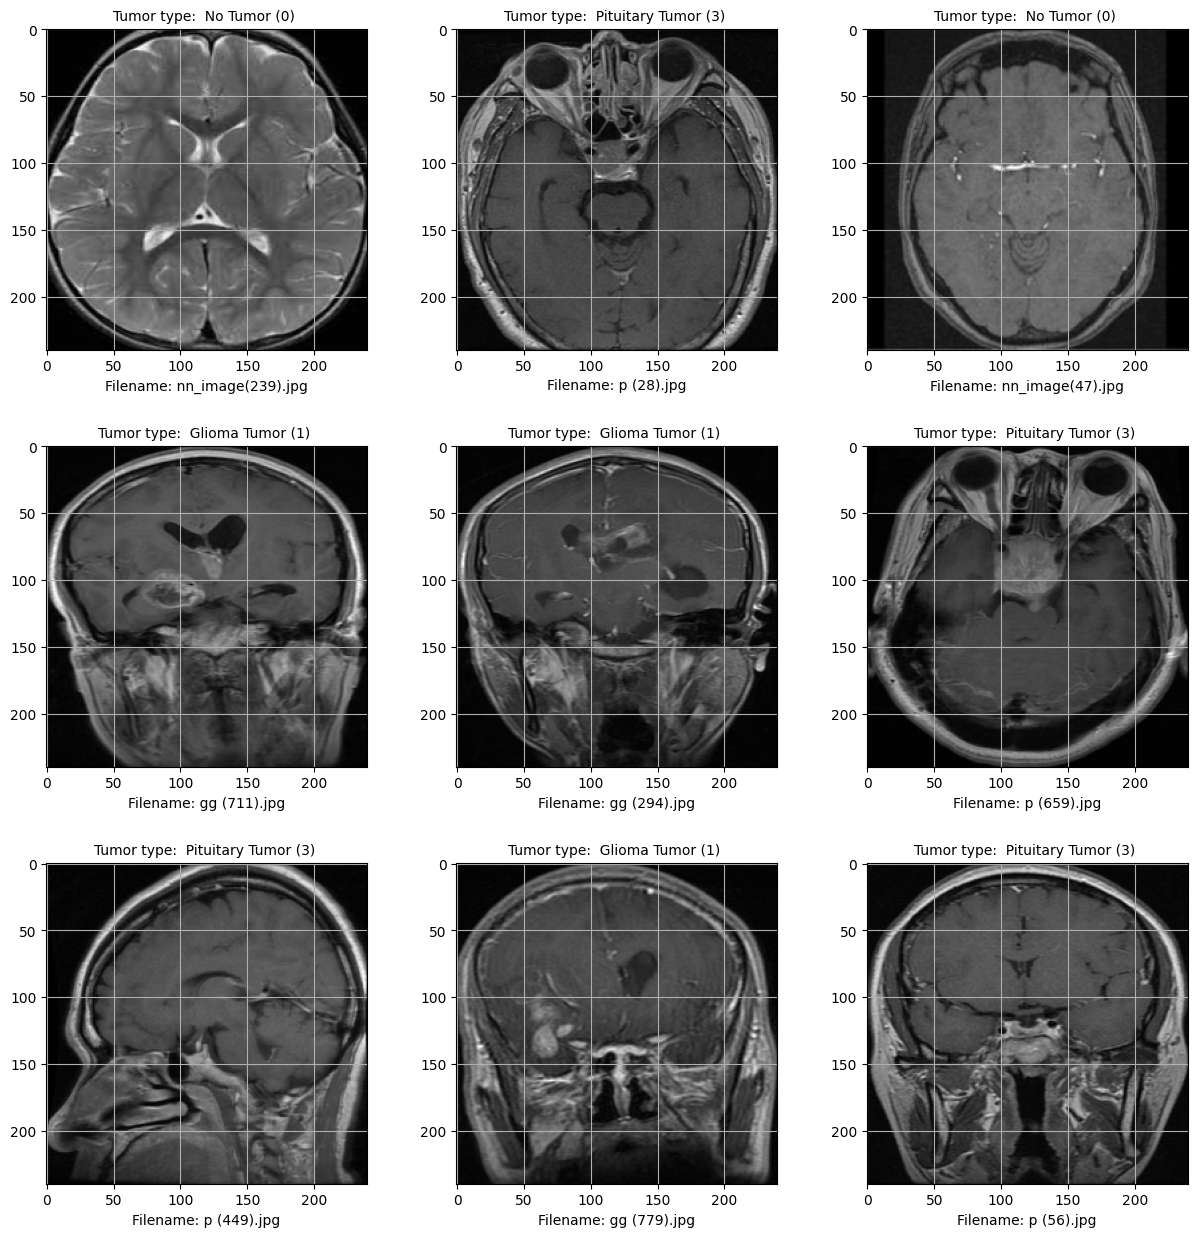

In [6]:
iter=0
plt.figure(figsize = (15,15))
for i in range(3):
    for k in range(3):
        iter= iter + 1

        plt.subplot(3, 3, iter)
        plt.imshow(training_data_MRI[iter], cmap='gray')
        plt.title(f'Tumor type:  {class_names[training_labels_MRI[iter]]} ({training_labels_MRI[iter]}) ',
                  fontsize=10)
        plt.xlabel(f'Filename: {training_text_MRI[iter]}', fontsize=10)
        plt.grid()
plt.subplots_adjust(hspace=0.3)

# <span style="color:blue" > Plot the same images as above, but without cropping or resizing </span>

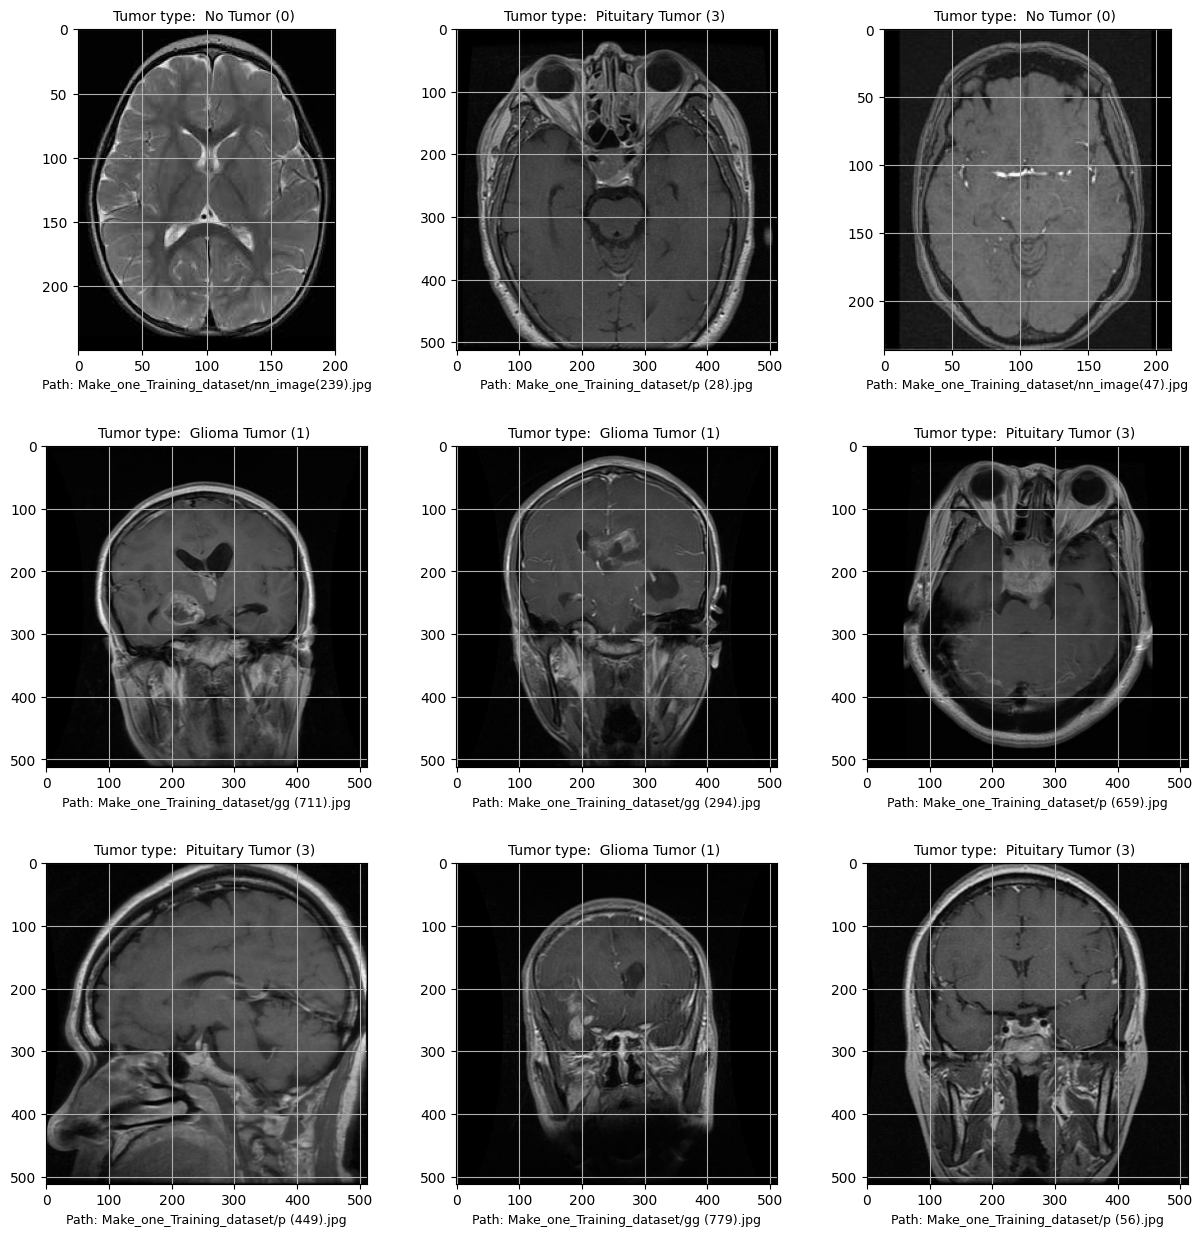

In [7]:
images =[]
# since above, the iter started at 1
samples_above = training_text_MRI[1:10]
plt.figure(figsize = (15,15))
for specific_image in samples_above:
    imag = cv2.imread(home_dir_train+specific_image)
    images.append(imag)

its =0
for k in range(3):
    for u in range(3):
        its = its +1
        plt.subplot(3, 3, its)
        plt.imshow(images[its-1])
        plt.xlabel(f'Path: {home_dir_train+samples_above[its-1]}', fontsize=9)
        plt.title(f'Tumor type:  {class_names[training_labels_MRI[its]]} ({training_labels_MRI[its]}) ',
                  fontsize=10)
        plt.grid()

plt.subplots_adjust(hspace=0.3)


### <span style="color:blue"> Split the training dataset into training and validation sets </span>

In [8]:

X_train_MRI, X_val_MRI, y_train_MRI, y_val_MRI = train_test_split(training_data_MRI, training_labels_MRI,
                                                              test_size=0.1289, random_state=42)

print(f'Training dataset shape for MRI images: {X_train_MRI.shape}')
print(f'Validation dataset shape for MRI images: {X_val_MRI.shape}\n')

print(f'Training labels shape for MRI images: {y_train_MRI.shape}')
print(f'Validation labels shape for MRI images: {y_val_MRI.shape}')




Training dataset shape for MRI images: (2500, 240, 240)
Validation dataset shape for MRI images: (370, 240, 240)

Training labels shape for MRI images: (2500,)
Validation labels shape for MRI images: (370,)


## <span style="color:blue"> Normalizing Data and Converting to Float32</span>

In [9]:
# Normalize pixel values in the test set
X_test_MRI = X_test_MRI.copy() / 255.0
# Convert the data type to 'float32'
X_test_MRI = X_test_MRI.astype('float32')

# Normalize pixel values in the training set
X_train_MRI = X_train_MRI.copy() / 255.0
# Convert the data type to 'float32'
X_train_MRI= X_train_MRI.astype('float32')

# Normalize pixel values in the validation set
X_val_MRI = X_val_MRI.copy()/255.0
# Convert the data type to 'float32'
X_val_MRI= X_val_MRI.astype('float32')

print('Normalized pixel values in training dataset: min={}, max={}'.format(X_train_MRI.min(), X_train_MRI.max()))
print('Normalized pixel values in testing dataset: min={}, max={}'.format(X_test_MRI.min(), X_test_MRI.max()))
print('')
print('Normalized pixel values in validation dataset: min={}, max={}'.format(X_val_MRI.min(), X_val_MRI.max()))

Normalized pixel values in training dataset: min=0.0, max=1.0
Normalized pixel values in testing dataset: min=0.0, max=1.0

Normalized pixel values in validation dataset: min=0.0, max=1.0


# <span style='color:blue'> Implementing Activation Functions Selected Through Hyperparameter Tuning </span>

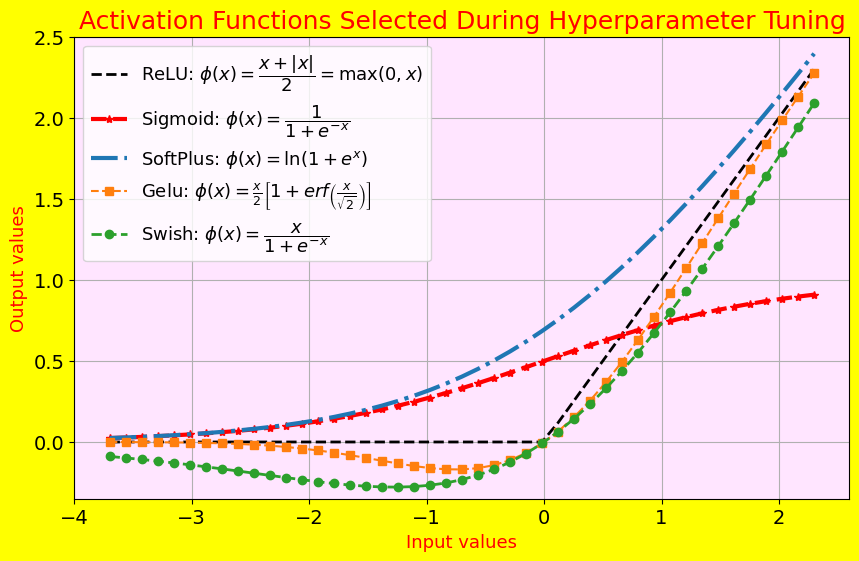

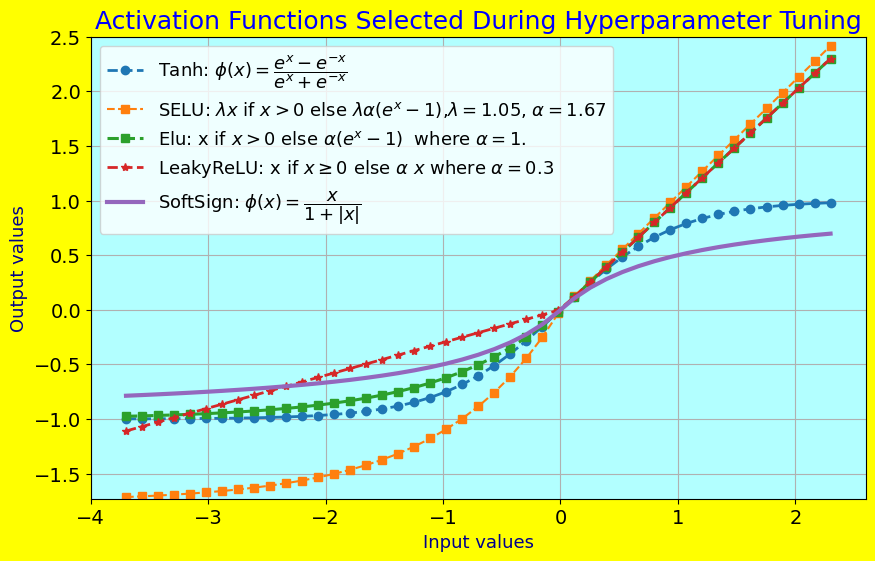

In [10]:
#######################################################################################################
# Defining Common Neural Network Activation Functions Using Lambda Expressions
#######################################################################################################
# Rectified Linear Unit (ReLU)
ReLU = lambda x: x if x>=0 else 0
#######################################################################################################
# Sigmoid Activation function
Sigmoid = lambda x: 1/(1+ np.exp(-x))

#######################################################################################################
# Softplus Activation function element-wise
SoftPlus = lambda x: np.log(1+ np.exp(x))

#######################################################################################################
# Softsign Activation Function
SoftSign = lambda x: x/(abs(x)+ 1)
#######################################################################################################

TanH= lambda x: (np.exp(x)- np.exp(-x))/(np.exp(x)+ np.exp(-x))

#######################################################################################################
# Scaled Exponential Linear Unit (SELU).
alpha_selu = 1.67326324
scale=1.05070098
Selu = lambda x: scale*x if x>=0  else scale*alpha_selu*(np.exp(x)-1)
#######################################################################################################

# Exponential Linear Units (ELUs)
alpha_elu =1.00
Elu = lambda x: x if x>=0 else alpha_elu* (np.exp(x)-1)

#######################################################################################################
# Leaky Rectified Linear Unit, or Leaky ReLU
alpha_Leaky =0.30
LeakyReLU = lambda x: alpha_Leaky * x if x<0 else x

#######################################################################################################
# Swish (or Silu) activation function.

Silu = lambda x: x*(1/(1+ np.exp(-x)))

#######################################################################################################

# Gaussian error linear unit (GELU) activation function.
Gelu = lambda x:  (0.5 * x * (1 + tf.math.erf(x / np.sqrt(2)))).numpy()

########################################################################################################

# Generating Data for Plotting Key Neural Network Activation Functions
X = np.linspace(-3.7, 2.3, 45)
y_relu = [ReLU(x) for x in X]
y_sigmoid = [Sigmoid(x) for x in X]
y_softplus = [SoftPlus(x) for x in X]
y_tanh = [TanH(x) for x in X]
y_softsign = [SoftSign(x) for x in X]
y_Selu = [Selu(x) for x in X]
y_elu = [Elu(x) for x in X]
y_leakyrelu = [LeakyReLU(x) for x in X]
y_silu = [Silu(x) for x in X]
y_gelu = [Gelu(x) for x in X]

# #####################################################################################
plt.figure(figsize=(10, 6), facecolor='yellow')
plt.axhspan(-0.5, 2.5, facecolor='magenta', alpha=0.1)
plt.plot(X, y_relu, '--',c='black', lw=2, label=r'ReLU: $\phi(x)= \dfrac{x+ |x|}{2}= \max(0, x)$')
plt.plot(X, y_sigmoid,'--*', c='red', lw=3,  label=r'Sigmoid: $\phi(x) = \dfrac{1}{1+e^{-x}}$')
plt.plot(X, y_softplus,'-.', lw=3,  label=r'SoftPlus: $\phi(x)= \ln(1 + e^{x})$')
plt.plot(X, y_gelu,'--s', label=r'Gelu: $\phi(x) = \frac{x}{2} \left[1+ erf\left(\frac{x}{\sqrt{2}} \right) \right]$')
plt.plot(X, y_silu,'--o', lw=2, label=r'Swish: $\phi(x) =  \dfrac{x}{1+e^{-x}} $')
plt.title('Activation Functions Selected During Hyperparameter Tuning', color='red',fontsize=18)
plt.legend(fontsize=13)
plt.xlabel('Input values', fontsize=13, color='red')
plt.ylabel('Output values', fontsize=13, color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.35, 2.5)
plt.grid()
plt.show()
print('\n \n')
print('\n \n')
#####################################################################################
plt.figure(figsize=(10, 6), facecolor='yellow')
plt.axhspan(-2, 3.2, facecolor='cyan', alpha=0.3)
plt.plot(X, y_tanh,'--o', lw=2, label=r'Tanh: $\phi(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$')
plt.plot(X, y_Selu, '--s', label=r'SELU: $\lambda x$ if $x > 0$ else $\lambda \alpha (e^x - 1)$,$\lambda=1.05$, $\alpha=1.67$')
plt.plot(X, y_elu,'--s', lw=2.2,  label=r'Elu: x if $x >0$ else $\alpha (e^x-1)$  where $\alpha=1.$ ')
plt.plot(X, y_leakyrelu, '--*', lw=2, label=r'LeakyReLU: x if $x \geq 0 $ else $\alpha \ x$ where $\alpha=0.3$ ')
plt.plot(X, y_softsign, lw=3, label=r'SoftSign: $\phi(x) = \dfrac{x}{1+|x|}$')
plt.title('Activation Functions Selected During Hyperparameter Tuning', fontsize=18, color='blue')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Input values', fontsize=13, color='darkblue')
plt.ylabel('Output values', fontsize=13, color='darkblue')
plt.legend(fontsize=13)
plt.ylim(-1.73, 2.5)
plt.show()

## <span style = 'color:olive'> Implementing a Hypermodel with Tunable Hyperparameters:<br> Selecting the Best Activation Function from Ten Options, Node Count, and Optimization Algorithms (Stochastic Gradient Descent, Adam, Adagrad) with Optimal Learning Parameters.</span>

In [11]:

class HyperModel(kt.HyperModel):

    def __init__(self, x_train, x_val, x_test, y_train, y_val, y_test ):
        super().__init__()
        self.final_model = None
        self.epoch_number = 56
        self.x_train = x_train
        self.x_val =x_val
        self.x_test = x_test
        self.y_train= y_train
        self.y_val= y_val
        self.y_test = y_test
        self.early_stop =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              min_delta=0,
                                              patience = 15,
                                              verbose =0,
                                              mode='auto',
                                              baseline=None,
                                              restore_best_weights=False,
                                              start_from_epoch=0)


    def build(self,hp):
        # Define hyperparameters within the method
        hp_nodes_1 = hp.Int('Number_nodes_1', min_value=30, max_value=540, step=30)
        hp_nodes_2 = hp.Int('Number_nodes_2', min_value=30, max_value=540, step=20)
        hp_nodes_3 = hp.Int('Number_nodes_3', min_value=30, max_value=540, step=20)
        #############################################################################################################
        ##############################################################################################################
        # Activation functions to be chosen for each layer
        #############################################################################################################

        hp_activation_1= hp.Choice('activation_1',
                               values= ['relu', 'sigmoid', 'softplus', 'softsign',
                                        'tanh', 'selu','elu', 'gelu', 'LeakyReLU', 'silu'])

        hp_activation_2= hp.Choice('activation_2',
                                        values=['relu', 'sigmoid', 'softplus', 'softsign',
                                        'tanh', 'selu','elu', 'gelu', 'LeakyReLU', 'silu'])
        hp_activation_3 = hp.Choice('activation_3',
                                        values=['relu', 'sigmoid', 'softplus', 'softsign',
                                        'tanh', 'selu','elu', 'gelu', 'LeakyReLU', 'silu'])

        #############################################################################################################
        #  Model architecture
        encoder_input = keras.Input(shape=(240, 240), name="original_img")
        x = tf.keras.layers.Flatten()(encoder_input)
        x = tf.keras.layers.Dense(units= hp_nodes_1, activation = hp_activation_1)(x)
        x = tf.keras.layers.Dense(units= hp_nodes_2, activation = hp_activation_2)(x)
        x = tf.keras.layers.Dense(units= hp_nodes_3, activation = hp_activation_3)(x)
        out  = tf.keras.layers.Dense(units=4, activation ='softmax')(x)

        #############################################################################################################
        # Choosing the optimazation algorithms and its hyperparameter, learning rate
        #############################################################################################################

        hp_optimizer = hp.Choice('Optimizer', values=['SGD', 'Adam',   'Adagrad'])
        learnings = [0.1, 0.07, 0.03, 0.01,  0.007, 0.005, 0.001, 0.0007, 0.0005, 0.0003, 0.0001 ]

        if hp_optimizer=='SGD':
            hp_learning_SGD = hp.Choice ('learning_rate_SGD', values=learnings)
            Optimizer = tf.keras.optimizers.legacy.SGD(learning_rate= hp_learning_SGD)

        elif hp_optimizer =='Adam':
            hp_learning_adam = hp.Choice ('learning_rate_Adam', values=learnings)
            Optimizer=  tf.keras.optimizers.legacy.Adam(learning_rate= hp_learning_adam )

        elif hp_optimizer=='Adagrad':
            hp_learning_Adagrad = hp.Choice ('learning_rate_Adagrad', values=learnings)
            Optimizer = tf.keras.optimizers.legacy.Adagrad(learning_rate= hp_learning_Adagrad)


        #############################################################################################################
        # Put it into the model
        #############################################################################################################
        self.model = tf.keras.models.Model(encoder_input, out, name="Hypermodel")
        #Compile it
        self.model.compile(optimizer =  Optimizer,
                loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
        return self.model

    def Tune(self):
        # Initialize and configure the Hyperband tuner for hyperparameter optimization using Keras Tuner.
        # Objective is to maximize validation accuracy over a maximum of 100 epochs, with a reduction factor of x.
        # The tuner will explore different configurations, storing results in 'My_Directory' under project 'X_Y'.
        # The search process involves training the model for up to 35 epochs with early stopping and validation data.
        tuner = kt.Hyperband(self.build,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor= 3,
                     directory ='My_Directory',
                     project_name='X_Y')

        # Execute the search to find the best model parameters based on the training and validation datasets.
        tuner.search(self.x_train, self.y_train, epochs=40, callbacks = [self.early_stop],
                      validation_data = (self.x_val, self.y_val))
        return tuner

    def Train_and_Obtain_Hypermodel(self):
        best_parameters = self.Tune().get_best_hyperparameters(num_trials=1)[0]
        tunne = self.Tune()
        model_hyperparameter = tunne.hypermodel.build(best_parameters)

        self.history_hypermarameter = model_hyperparameter.fit(self.x_train,
                                                               self.y_train, epochs=self.epoch_number,
                                               validation_data =[self.x_val, self.y_val])

        val_acc_per_epoch = self.history_hypermarameter.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))

        hypermodel_Best_Epoch = self.Tune().hypermodel.build(best_parameters)

        hypermodel_Best_Epoch.fit(self.x_train, self.y_train, epochs=best_epoch, validation_data=[self.x_val, self.y_val], verbose=1)


        #####################
        Acc_best_epoch = hypermodel_Best_Epoch.evaluate(self.x_test, self.y_test)[1]

        Acc_hyper =model_hyperparameter.evaluate(self.x_test, self.y_test)[1]

        if Acc_hyper >=Acc_best_epoch:
            print(f'Selected Hyperparameter Tuned Model (Accuracy: {Acc_hyper:.2f}%) over Best Epoch Model (Accuracy: {Acc_best_epoch:.2f}%)')
            self.final_model= model_hyperparameter
        else:
            print(f'Selected Best Epoch Model (Accuracy: {Acc_best_epoch:.2f}%) over Hyperparameter Tuned Model (Accuracy: {Acc_hyper:.2f}%)')
            self.final_model = hypermodel_Best_Epoch



    def plot_history(self):

        font1 = {'family':'DejaVu Sans','color':'darkblue','size':11}
        font2 = {'family':'STIXGeneral','color':'darkred','size':15}
        x_epoch = np.arange(1, self.epoch_number +1)

        plt.figure(figsize=(15,6))
        plt.subplot(1, 2, 1)
        plt.title('Accuracy Across Epochs for Training and Validation Datasets', fontdict=font1)
        plt.plot(x_epoch, self.history_hypermarameter.history['accuracy'],'.-',
                 color='black', label='Train data accuracy')
        plt.plot(x_epoch, self.history_hypermarameter.history['val_accuracy'], '.-' ,
                 color='blue', label='Validatin data accuracy')

        plt.xlabel('Epochs', fontdict=font2)
        plt.ylabel('Accuracy', fontdict=font2)
        plt.legend(fontsize=12)
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.title('Loss Across Epochs for Training and Validation Datasets', fontdict=font1)
        plt.plot(x_epoch, self.history_hypermarameter.history['loss'], '.-',
                 color='black', label='Train data loss')
        plt.plot(x_epoch, self.history_hypermarameter.history['val_loss'], '.-' ,
                 color='blue', label='Validatin data Loss')
        plt.xlabel('Epochs', fontdict=font2)
        plt.ylabel('Loss', fontdict=font2)
        plt.legend(fontsize=12)
        plt.grid()
        plt.show()


    def Evaluate_model(self):
        self.final_model.summary()
        probabilities = self.final_model.predict(self.x_test)
        predicted_labels = np.argmax(probabilities, axis=1)

        print('Printing Confution Matrix')
        target_names = [class_names[label] for label in range(4) ]
        cm = confusion_matrix(self.y_test, predicted_labels)
        disp_base = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
        disp_base.plot()
        plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
        plt.show()

        print('Printing Classification Report \n')
        print(classification_report(predicted_labels, self.y_test, target_names=target_names))

    def get_the_Best_Parameters(self):

        best_parameters = self.Tune().get_best_hyperparameters(num_trials=1)[0]
        print('The best activation function found in the first layer is: {}'.format(best_parameters.get('activation_1')))
        print('The optimal number of nodes for the first layer is: {} \n'.format(best_parameters.get('Number_nodes_1')))
        print('\n')
        print('The best activation function found in the second layer is: {}'.format(best_parameters.get('activation_2')))
        print('The optimal number of nodes for the second layer is: {}'.format(best_parameters.get('Number_nodes_2')))
        print('\n')
        print('The best activation function found in the third layer is: {}'.format(best_parameters.get('activation_3')))
        print('The optimal number of nodes for the third layer is: {}'.format(best_parameters.get('Number_nodes_3')))
        print('\n')
        print('The best optimizer found during hyperparameter tuning is: {} \n'.format(best_parameters.get('Optimizer')))
        print('\n')
        best_optimizer = best_parameters.get('Optimizer')

        if best_optimizer == 'SGD':
            print('The best learning rate for SGD is: {}'.format(best_parameters.get('learning_rate_SGD')))
        elif best_optimizer == 'Adam':
            print('The best learning rate for Adam is: {}'.format(best_parameters.get('learning_rate_Adam')))

        elif best_optimizer == 'Adagrad':
            print('The best learning rate for Adagrad is: {}'.format(best_parameters.get('learning_rate_Adagrad')))




In [12]:
Time_before_excecution = time.time()

hyper = HyperModel(X_train_MRI,X_val_MRI, X_test_MRI, y_train_MRI, y_val_MRI, y_test_MRI )
hyper.Tune()

Time_After_Excecution = time.time()


elapsed_time = Time_After_Excecution - Time_before_excecution
print('Execution time:', elapsed_time, 'seconds')
print('\n')

Reloading Tuner from My_Directory/X_Y/tuner0.json
Execution time: 0.1352241039276123 seconds




In [13]:
hyper.Train_and_Obtain_Hypermodel()

Reloading Tuner from My_Directory/X_Y/tuner0.json
Reloading Tuner from My_Directory/X_Y/tuner0.json
Epoch 1/56
79/79 [==============================] - 1s 14ms/step - loss: 1.4642 - accuracy: 0.3500 - val_loss: 2.5507 - val_accuracy: 0.3027
Epoch 2/56
79/79 [==============================] - 1s 12ms/step - loss: 1.1764 - accuracy: 0.4660 - val_loss: 2.0097 - val_accuracy: 0.3081
Epoch 3/56
79/79 [==============================] - 1s 12ms/step - loss: 1.0751 - accuracy: 0.5244 - val_loss: 1.2491 - val_accuracy: 0.4135
Epoch 4/56
79/79 [==============================] - 1s 12ms/step - loss: 1.0084 - accuracy: 0.5548 - val_loss: 1.1981 - val_accuracy: 0.5676
Epoch 5/56
79/79 [==============================] - 1s 12ms/step - loss: 0.9224 - accuracy: 0.6032 - val_loss: 1.1083 - val_accuracy: 0.5432
Epoch 6/56
79/79 [==============================] - 1s 13ms/step - loss: 0.8170 - accuracy: 0.6492 - val_loss: 1.0704 - val_accuracy: 0.5459
Epoch 7/56
79/79 [==============================] - 1s

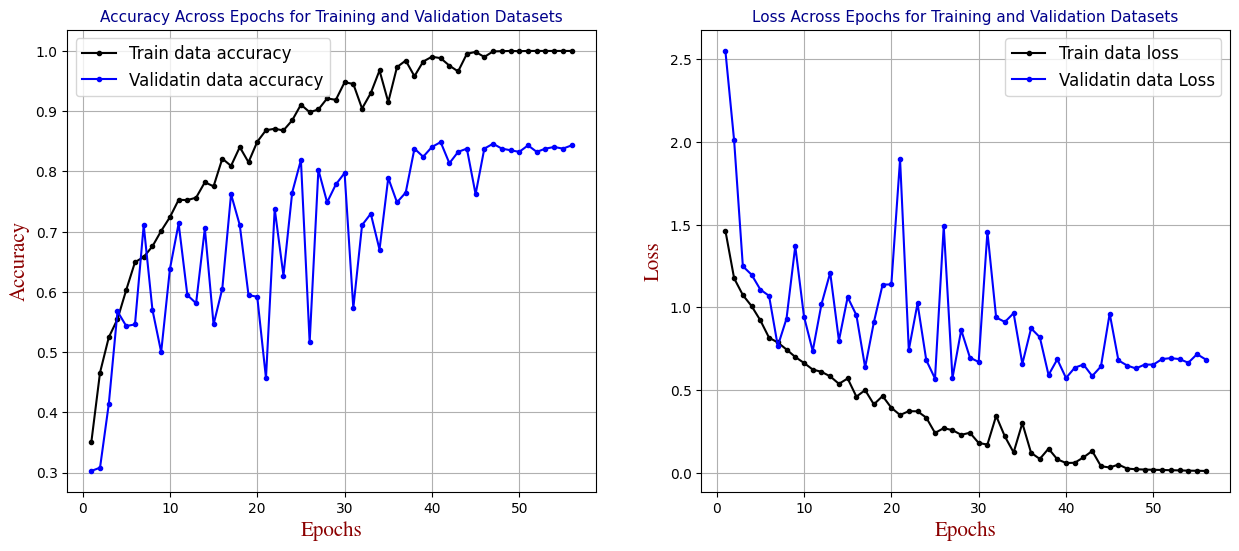

In [14]:
hyper.plot_history()

Model: "Hypermodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 240, 240)]        0         
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 210)               12096210  
                                                                 
 dense_5 (Dense)             (None, 50)                10550     
                                                                 
 dense_6 (Dense)             (None, 510)               26010     
                                                                 
 dense_7 (Dense)             (None, 4)                 2044      
                                                                 
Total params: 12134814 (46.29 MB)
Trainable params: 1213

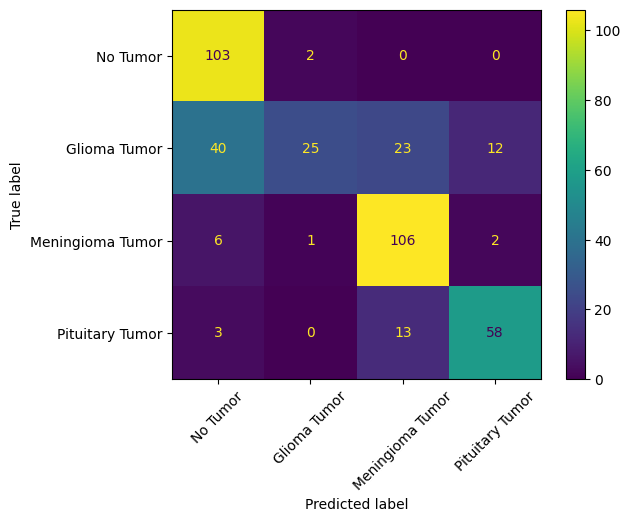

Printing Classification Report 

                  precision    recall  f1-score   support

        No Tumor       0.98      0.68      0.80       152
    Glioma Tumor       0.25      0.89      0.39        28
Meningioma Tumor       0.92      0.75      0.82       142
 Pituitary Tumor       0.78      0.81      0.79        72

        accuracy                           0.74       394
       macro avg       0.73      0.78      0.70       394
    weighted avg       0.87      0.74      0.78       394



In [16]:
hyper.Evaluate_model()

In [17]:
hyper.get_the_Best_Parameters()


Reloading Tuner from My_Directory/X_Y/tuner0.json
The best activation function found in the first layer is: selu
The optimal number of nodes for the first layer is: 210 



The best activation function found in the second layer is: selu
The optimal number of nodes for the second layer is: 50


The best activation function found in the third layer is: elu
The optimal number of nodes for the third layer is: 510


The best optimizer found during hyperparameter tuning is: Adagrad 



The best learning rate for Adagrad is: 0.005
